In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

In [2]:
df_isa = pd.read_csv('../data/dev/ISA.csv')
df_isa['Date'] = pd.to_datetime(df_isa['Date'])
df_isa = df_isa.set_index('Date')

In [3]:
df_isa

,Instrument Name,Year,Month,Day,High,Low,Mid,Close,Close Previous,Volume,Variation,Absolute Variation,Quantity
Date,,,,,,,,,,,,,
2003-07-03,ISA,2003,7,3,1041.0,1038.0,1039.8528,1041.0,NaN,153392851,0.3900,4.0,147514
2003-07-04,ISA,2003,7,4,1040.0,1037.0,1039.5585,1040.0,1041.0,252284203,-0.1000,-1.0,242684
2003-07-07,ISA,2003,7,7,1040.0,1039.0,1039.7341,1040.0,1040.0,154115627,0.0000,0.0,148226
2003-07-08,ISA,2003,7,8,1030.0,1015.0,1022.1858,1018.0,1040.0,609217622,-2.1200,-22.0,595995
2003-07-09,ISA,2003,7,9,1020.0,1010.0,1012.2169,1013.0,1018.0,173275330,-0.4900,-5.0,171184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,ISA,2022,6,24,21000.0,20400.0,20481.5200,20420.0,20300.0,2873229250,0.0059,120.0,140284
2022-06-28,ISA,2022,6,28,22000.0,20500.0,21621.1200,22000.0,20420.0,4991841400,0.0774,1580.0,230878
2022-06-29,ISA,2022,6,29,21760.0,21000.0,21289.1900,21200.0,22000.0,5993610010,-0.0364,-800.0,281533


In [4]:
df_isa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4596 entries, 2003-07-03 to 2022-07-01
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Instrument Name     4596 non-null   object 
 1   Year                4596 non-null   int64  
 2   Month               4596 non-null   int64  
 3   Day                 4596 non-null   int64  
 4   High                4596 non-null   float64
 5   Low                 4596 non-null   float64
 6   Mid                 4596 non-null   float64
 7   Close               4596 non-null   float64
 8   Close Previous      4594 non-null   float64
 9   Volume              4596 non-null   int64  
 10  Variation           4596 non-null   float64
 11  Absolute Variation  4596 non-null   float64
 12  Quantity            4596 non-null   int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 502.7+ KB


In [5]:
df_isa.describe()

,Year,Month,Day,High,Low,Mid,Close,Close Previous,Volume,Variation,Absolute Variation,Quantity
count,4596.000000,4596.000000,4596.000000,4596.000000,4596.000000,4596.000000,4596.000000,4594.000000,4.596000e+03,4596.000000,4596.000000,4.596000e+03
mean,2012.505222,6.479112,15.825283,10737.846171,10499.010444,10629.914794,10644.956484,10639.758380,4.042826e+09,0.084265,4.393603,4.081492e+05
std,5.503325,3.439924,8.770520,5955.228779,5802.669807,5878.941513,5883.756087,5879.636011,5.751649e+09,1.835041,232.482147,5.603661e+05
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,895.000000,895.000000,0.000000e+00,-24.090000,-3840.000000,0.000000e+00
25%,2008.000000,3.000000,8.000000,7050.000000,6907.500000,6988.866650,7000.000000,7000.000000,1.307256e+09,-0.750000,-70.000000,1.558200e+05
50%,2012.500000,7.000000,16.000000,9600.000000,9450.000000,9509.125000,9535.000000,9530.000000,2.520582e+09,0.000000,0.000000,2.682020e+05
75%,2017.000000,9.000000,23.000000,13660.000000,13420.000000,13540.697500,13560.000000,13560.000000,4.899384e+09,0.880000,80.000000,4.777985e+05
max,2022.000000,12.000000,31.000000,29250.000000,28800.000000,29091.810000,29250.000000,29250.000000,1.323960e+11,19.080000,2160.000000,1.649408e+07


For an initial analysis it is possible to observe some basic statistical data that give a general context of
the information to analyze


## Plotting Stock Price Trend and Returns

Based on the economic context of the data, the variables that are of greatest interest to analyze
the performance of ISA’s share value are the closing price because it shows the final daily valuation
and the returns that allow us to visualize the rate of change of action from day to day.


''

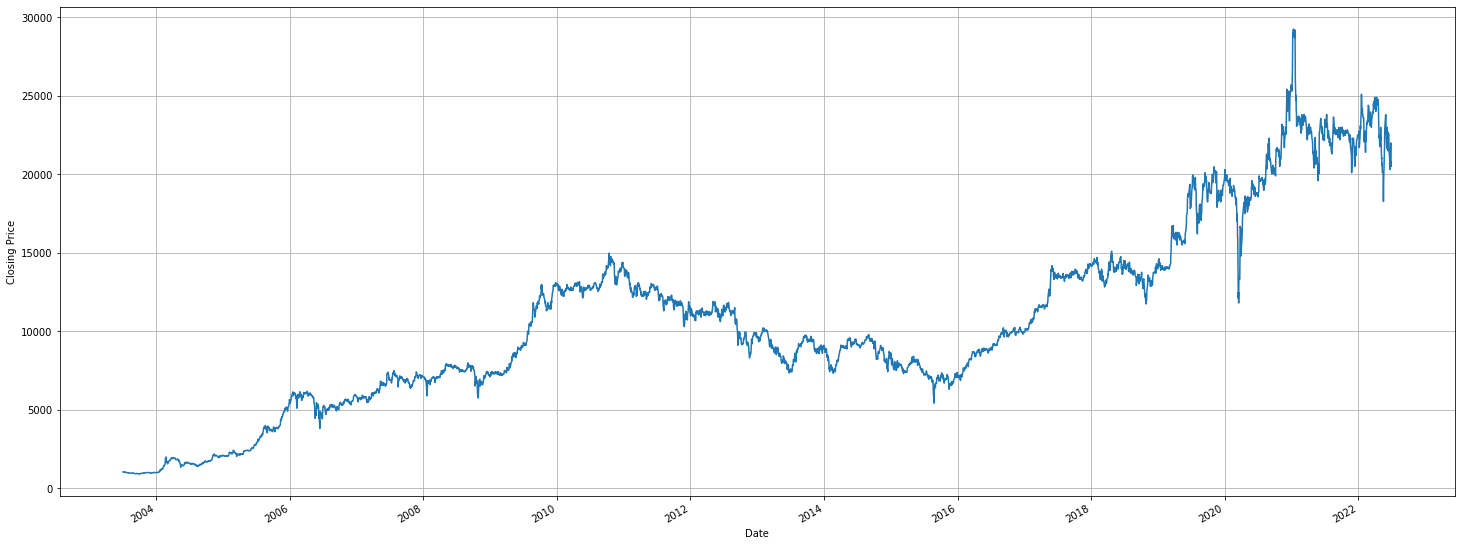

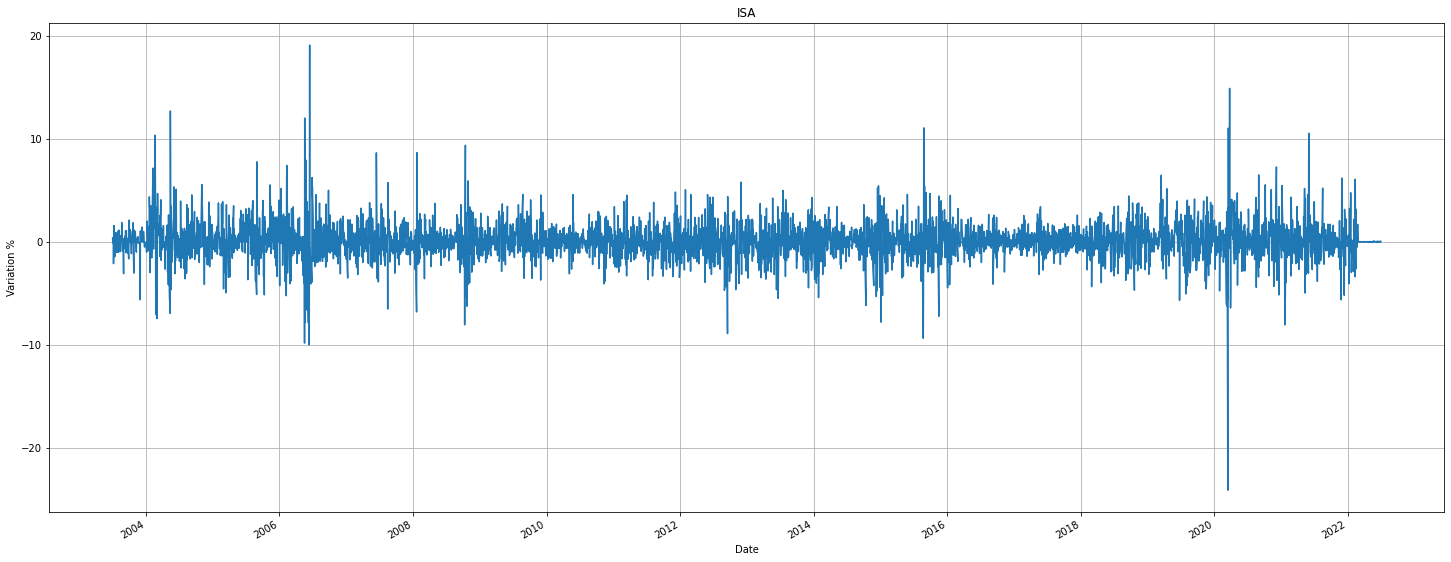

In [6]:
ax1 = df_isa.plot(use_index=True, y='Close', style=['-'], figsize=(25,10), ylabel='Closing Price', legend=False, grid=True)
ax2 = df_isa.plot(use_index=True, y='Variation', style=['-'], figsize=(25,10), ylabel='Variation %', legend=False, grid=True)


plt.title('ISA')

;

A general upward trend can be observed with a significant drawdown period between approximately
2011 and 2019. You can also see the impact of the covid 19 crisis in 2020 and a significant rebound
in 2021.
Regarding the variation, it can be observed that it moves in a similar range, except for some critical
points evidenced in the action, such as the impact on the stock market caused by the covid 19 health
emergency

## Dotted Plot

Given that the dataset has a daily variation and we have a dataset that covers a period of 18 years,
a dotted graph allows us to see in a little more detail the gap between one sample and the other
for both the closing price and the price. variation

''

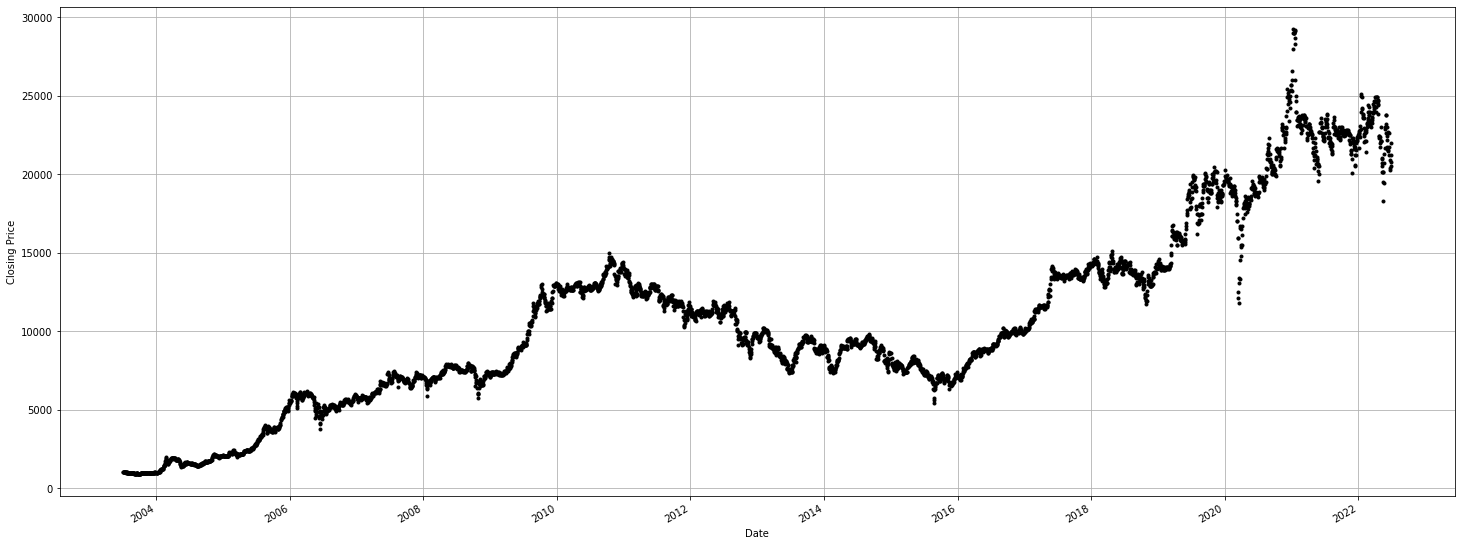

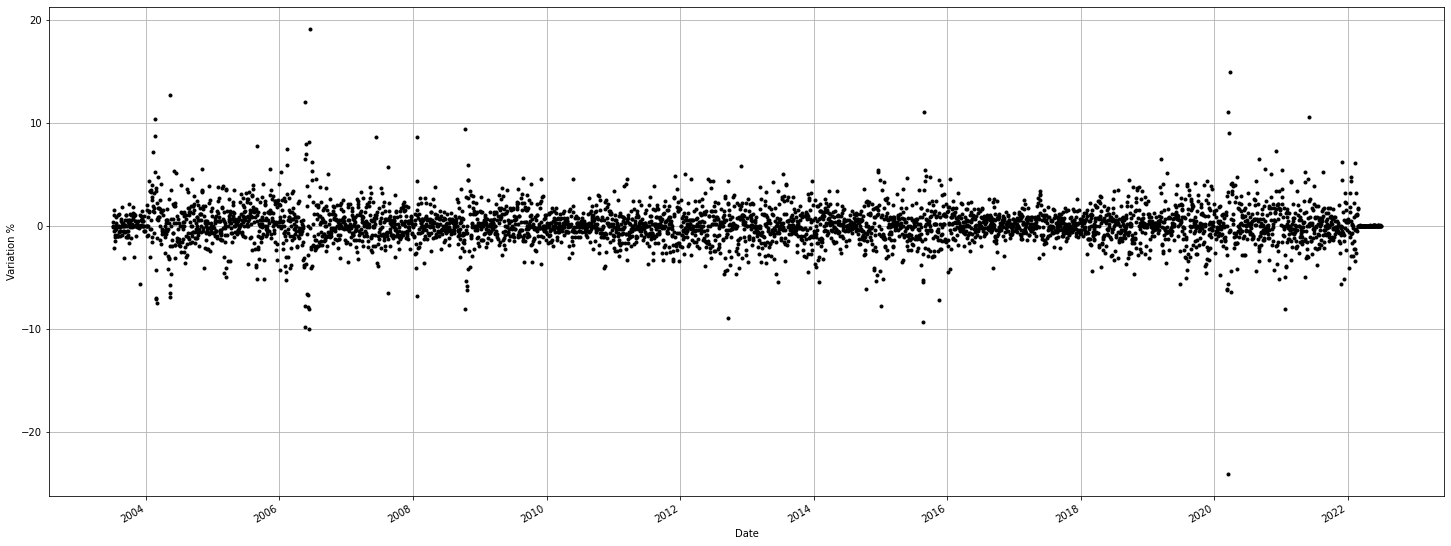

In [7]:
plt.figure()
ax3 = df_isa['Close'].plot(style='k.', grid=True, figsize=(25,10), ylabel='Closing Price')
plt.figure()
ax4 = df_isa['Variation'].plot(style='k.', grid=True, figsize=(25,10), ylabel='Variation %')



;

## Histogram of Prices and Returns

Another valuable analysis is knowing the distribution of our variables. One of the most common
ways is through a histogram that evaluates and graphically represents the frequency of the data.
The price for its variation does not present a normal distribution. However, from these data it can
be deduced that the control point (higher frequency) is approximately 7,000 pesos. Although the
price has been above 20,000 pesos since 2020, the most significant share values have been between
approximately 7,000 and 14,000 pesos.
On the other hand, the variation presents an apparently normal distribution with some very extreme
points reaching below -20% and almost 20%

''

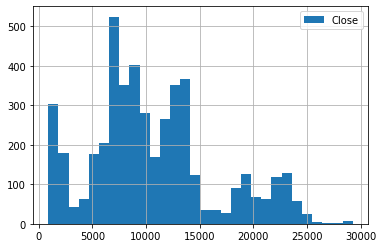

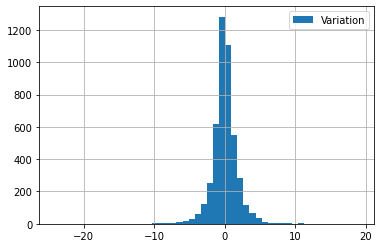

In [8]:
plt.figure()
ax5 = df_isa['Close'].hist(bins=30, legend=True)

plt.figure()
ax6 = df_isa['Variation'].hist(bins=50, legend=True)

;

## Kernel Density Plot

Continuing with the previous analysis, a better way to understand the behavior of the price and
the variation is by analyzing its density, which by smoothing some data gives us an idea of the
6
prices or variations where the confluence has been greater

''

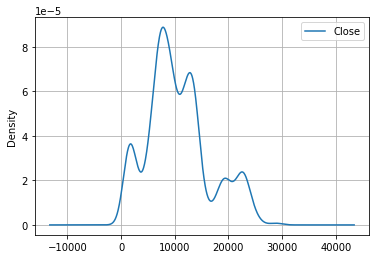

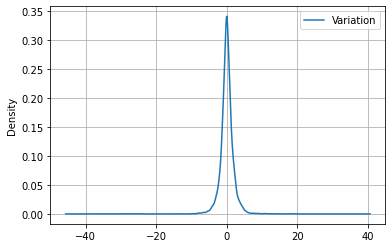

In [9]:
plt.figure()
ax6 = df_isa['Close'].plot(kind='kde', grid=True, legend=True)
plt.figure()
ax6 = df_isa['Variation'].plot(kind='kde', grid=True, legend=True)

;

## Plotting Moving Average

Another useful strategy to analyze time series is to reduce the variation of the data by applying
filters. A first approximation that we present is through a simple moving average comprised of a
window of 200 periods that presents the average evolution of the price based on the previous 200
data. A window of 200 is used because it is an industry standard measure and is used by many
institutions to assess the value of stocks.

''

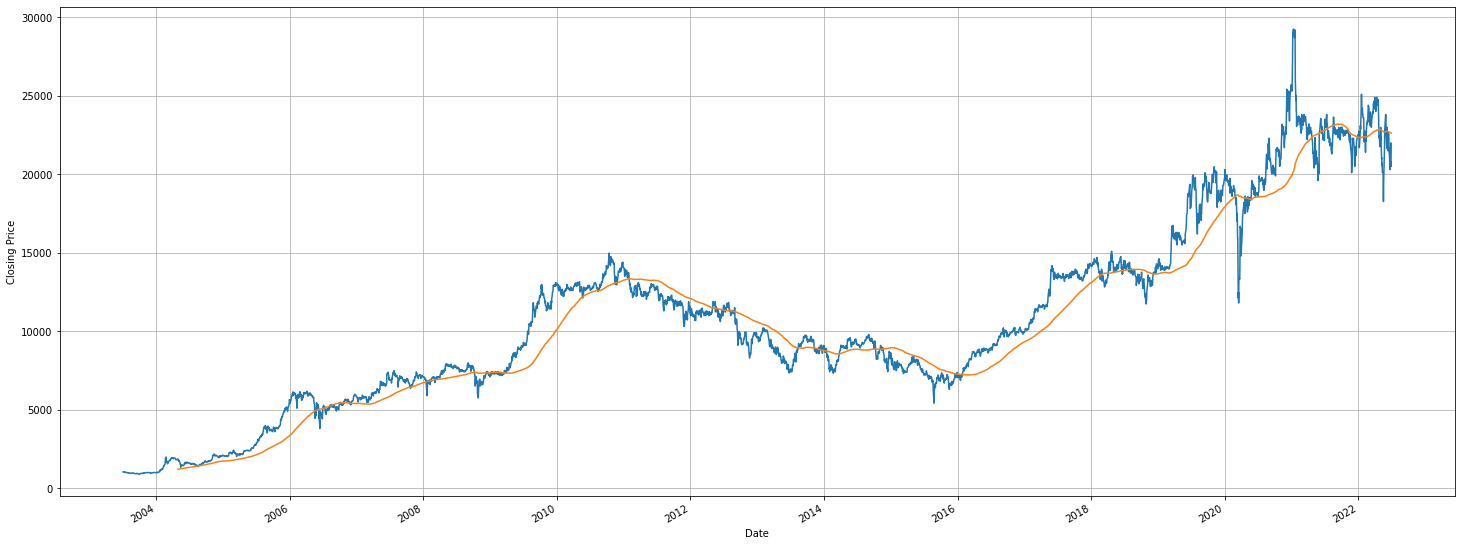

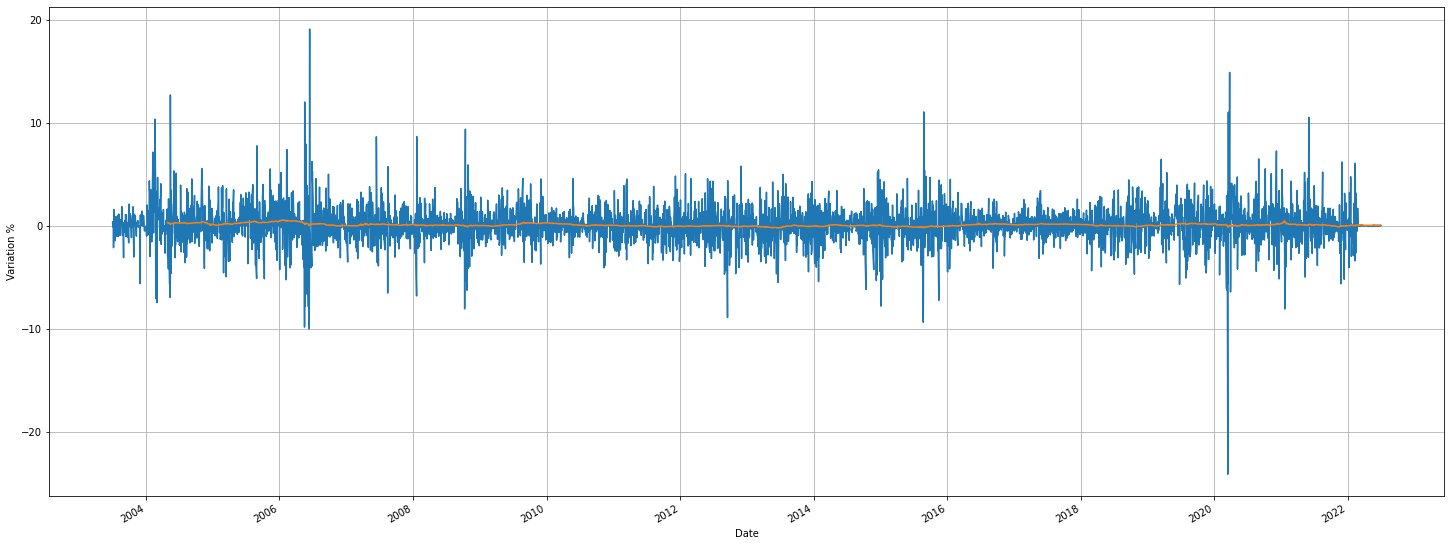

In [10]:
ax1 = df_isa.plot(use_index=True, y='Close', style=['-'], figsize=(25,10), ylabel='Closing Price', legend=False, grid=True)
price_mean = df_isa['Close'].rolling(200, win_type=None).mean()
price_mean.plot(style=['-', '--', ':'], grid=True, ylabel='Closing Price')

ax22 = df_isa.plot(use_index=True, y='Variation', style=['-'], figsize=(25,10), ylabel='Variation %', legend=False, grid=True)
price_mean = df_isa['Variation'].rolling(200, win_type=None).mean()
price_mean.plot(style=['-', '--', ':'], grid=True, ylabel='Variation %')

;

## Exponential Smoothing

Since the ultimate goal is to make a prediction model, it is important to reduce the variation of the
variable by smoothing it, however, a linear alternative such as the moving average usually generates
time shifts in the data, so non-linear options such as the exponential smoothing allows noise to be
smoothed without time shift implications


/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


''

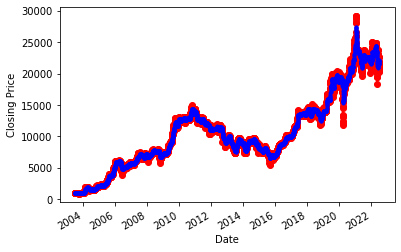

In [11]:
model = SimpleExpSmoothing(df_isa['Close']).fit(smoothing_level=.1, optimized=True)

df_isa['Close'].plot(marker='o', color='red', ylabel='Closing Price')
model.fittedvalues.plot(marker='.', color='blue')

;


## Lag Plot 

It is used to check if the series is random or not. Lag plot allows to do a price analysis between the observation of the sample in *t* and *t+1* where it is tried to verify if there is any pattern that shows that the series is not random, in other words to verify the existence of correlation between the samples.

 In the case of the closing price of the ISA stock, there is a positive correlation, which finally implies that its behavior can be modeled.
 A structure can then be observed that invites us to think of a linear trend in the evolution of the price.

''

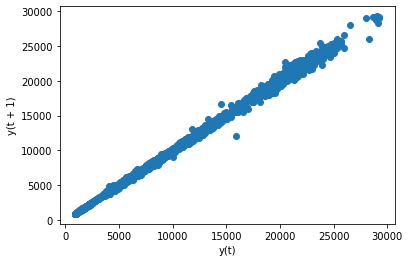

In [12]:
lag_plot(df_isa['Close'])

;

## Autocorrelation Plot

Autocorrelation plots are a commonly-used tool for checking randomness in a data set. This
randomness is ascertained by computing autocorrelations for data values at varying time lags. If
random, such autocorrelations should be near zero for any and all time-lag separations. If nonrandom, then one or more of the autocorrelations will be significantly non-zero.
Reinforcing the previous conclusion, it can be seen that the correlation of the data is notably far
from zero, so the variable of the closing price of the share does not have a random component that
predominates its evolution over time.


''

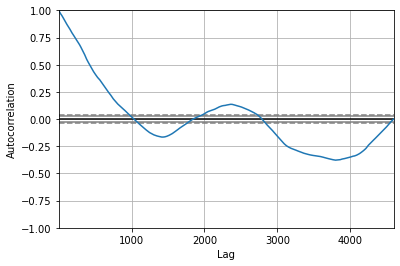

In [13]:
autocorrelation_plot(df_isa['Close'])

;

## Histogram of Volume

''

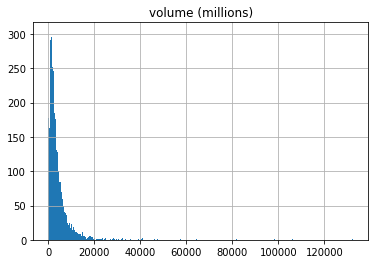

In [14]:
plt.figure()
ax5 = (df_isa['Volume']/1000000).hist(bins=500)

plt.title('volume (millions)')



;

Most of the daily volume traded is 10,000 million COP or less, there are some days with higher volumes but not very frequent. This figure indicates a market with decent liquidity that may attract investors to consider this asset in portfolios.

## Yearly price and volume trend (seasonal plot)

In [15]:
df_isa.reset_index(inplace=True)
#df_isa.insert(2, 'year',  df_isa['fecha'].apply(lambda x: x.year))
#df_isa.insert(3, 'month',  df_isa['fecha'].apply(lambda x: x.month))
#df_isa.insert(4, 'day',  df_isa['fecha'].apply(lambda x: x.day))
z = pd.DataFrame(df_isa.groupby(by = ['Year', 'Month'])['Close'].mean())
z.reset_index(inplace=True)
z.set_index('Month', inplace=True)


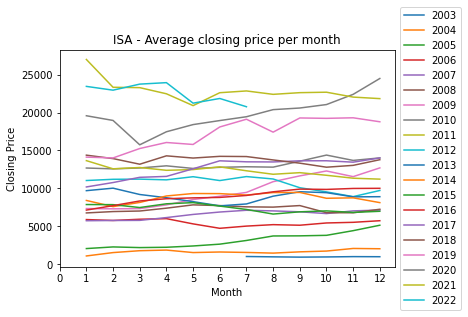

In [16]:
import numpy as np
for i in z['Year'].unique():
    z[z['Year'] == i]['Close'].plot(label=i)

    

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Closing Price')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.xticks(np.arange(0, 13, 1))
plt.title('ISA - Average closing price per month')
plt.show()




There is no clear pattern in the average price trend. There are even certain contradictory relationships, for example in 2021 between February and May the price fell, while in 2017 between February and April the price increased. There are years where through the months the price has been a bit flat, has fallen or has appreciated a bit.
In 2019, a great performance can be observed after the first two months, 2020 also ended with a great appreciation in value. The year 2005, a little different from the previous two years, also proved to be a strong year for stocks.

In [17]:
w = pd.DataFrame(df_isa.groupby(by = ['Year', 'Month'])['Volume'].mean())
w.reset_index(inplace=True)
w.set_index('Month', inplace=True)
w['Volume'] = w['Volume']/1000000


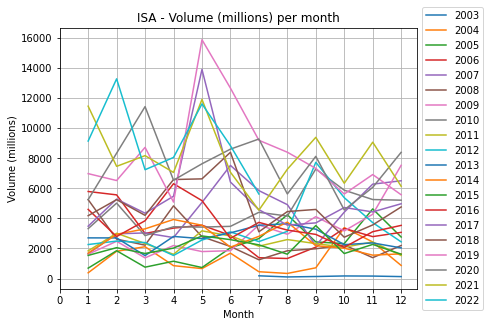

In [18]:
import numpy as np
for i in w['Year'].unique():
    w[w['Year'] == i]['Volume'].plot(label=i)

    

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Volume (millions)')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.xticks(np.arange(0, 13, 1))
plt.title('ISA - Volume (millions) per month')
plt.grid()
plt.show()

In the volume, a pattern can be analyzed in the years 2021, 2017 and 2019, since there was an increase in the volume in the month of May. Significant variations can be observed in the volumes of the years analyzed. That is, there are important changes in the total capital traded between one month and another

''

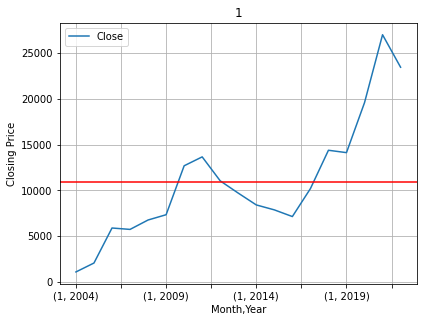

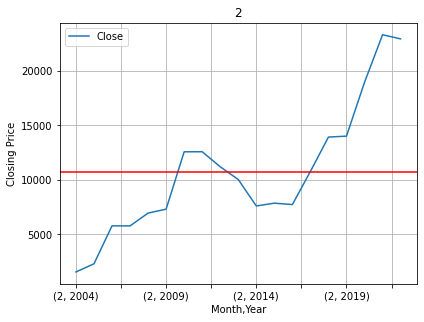

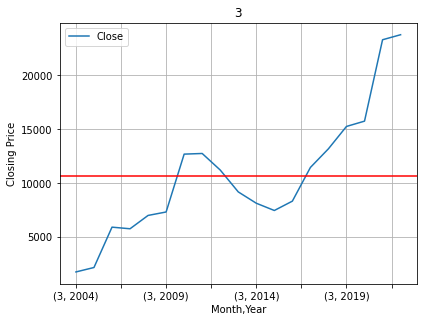

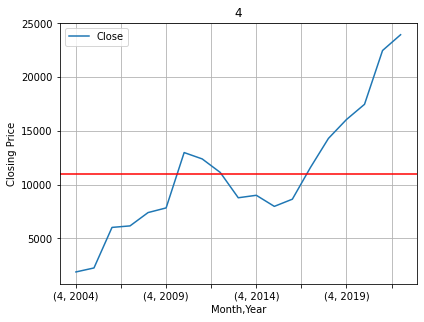

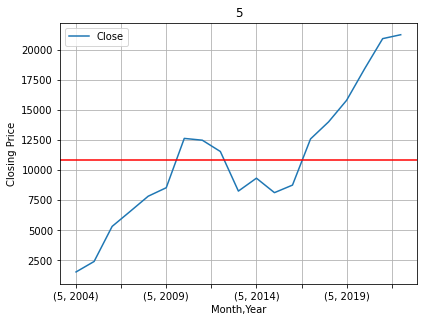

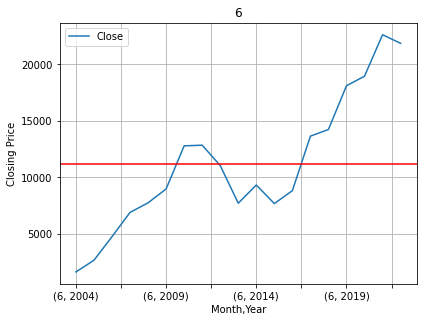

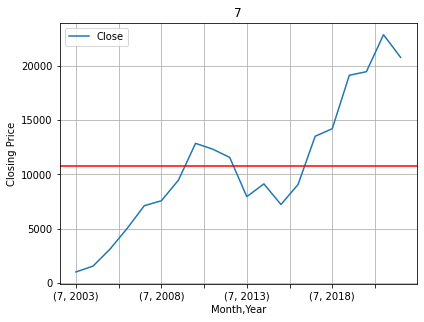

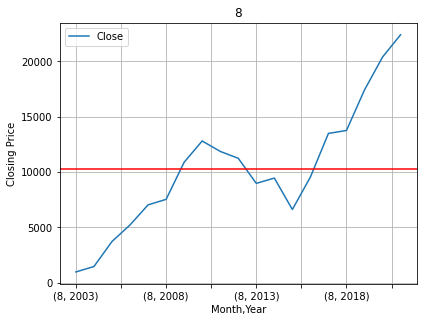

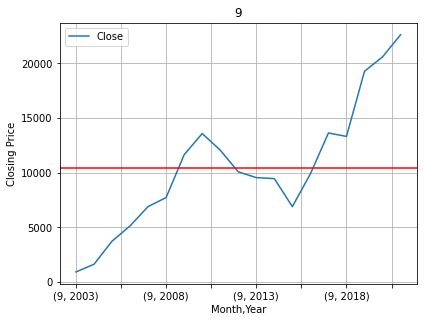

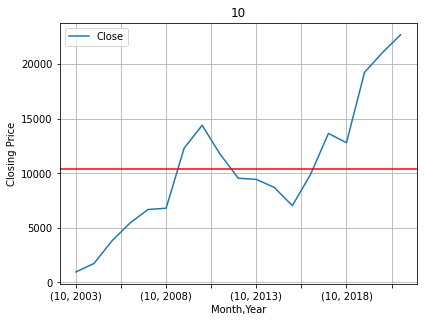

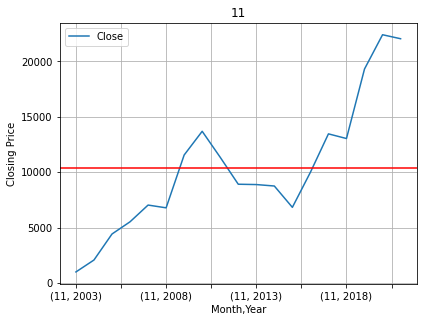

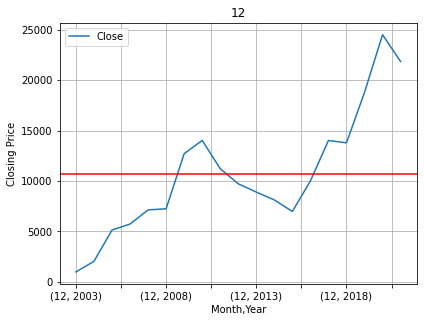

In [19]:
x = z.copy()
x.reset_index(inplace=True)
x.set_index(["Month", "Year"], inplace=True)
x.sort_index(inplace=True)

for i in range(1, 13, 1):
    x[np.in1d(x.index.get_level_values(0), [i])].plot(label=i)
    plt.axhline(int(x[np.in1d(x.index.get_level_values(0), [i])].mean()),color="red")
    plt.grid()
    plt.ylabel('Closing Price')
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
    plt.title(i)


;

A pattern can be observed in the behavior of the share price in the respective
months of the different years. There is an increase in value
for each of the periods, and this is preceded by a
recoil. In general, the company shows consistency in growth,
red line is the average of the prices and an average
similar around 10,000 COP which is consistent with the price of the point
of control mentioned in the previous points

In [20]:
df_isa.head(2)

,Date,Instrument Name,Year,Month,Day,High,Low,Mid,Close,Close Previous,Volume,Variation,Absolute Variation,Quantity
0,2003-07-03,ISA,2003,7,3,1041.0,1038.0,1039.8528,1041.0,NaN,153392851,0.39,4.0,147514
1,2003-07-04,ISA,2003,7,4,1040.0,1037.0,1039.5585,1040.0,1041.0,252284203,-0.10,-1.0,242684


In [21]:
#df_out = pd.DataFrame()
#df_out['Date'] = pd.to_datetime(df_isa['Date'])
#df_out['Instrument Name'] = df_isa['Nemotecnico']
#df_out['Year'] = df_isa['year']
#df_out['Month'] = df_isa['month']
#df_out['Day'] = df_isa['day']
#df_out['Quantity'] = df_isa['Cantidad']
#df_out['High'] = df_isa['Precio Mayor']
#df_out['Mid'] = df_isa['Precio Medio']
#df_out['Low'] = df_isa['Precio Menor']
#df_out['Close'] = df_isa['Precio Cierre']
#df_out['Close previous'] = df_isa['Precio Cierre'].shift(1)
#df_out['Volume'] = df_isa['Volumen']
#df_out['Variation'] = df_isa['Precio Cierre'].pct_change()*100.0
#df_out = df_out.set_index('Date').dropna()
#df_out

In [22]:
#path_out = '../data/dev/ISA.csv'
#df_out.to_csv(path_out, encoding='utf-8')

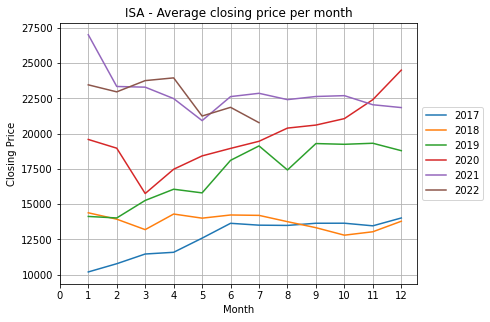

In [23]:
#datafolio plot
lastyears = z['Year'].unique()[z['Year'].unique() > 2016]
for i in lastyears:
    z[z['Year'] == i]['Close'].plot(label=i)

    

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Closing Price')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.xticks(np.arange(0, 13, 1))
plt.title('ISA - Average closing price per month')

plt.grid()
plt.show()

''

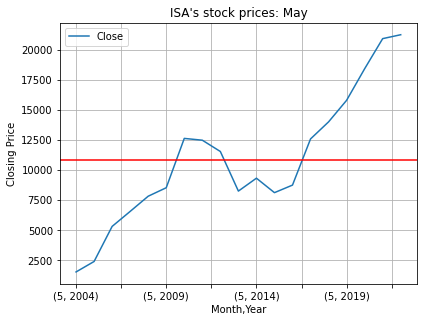

In [24]:
#datafolio plot
i=5
x.rename(columns = {'Precio Cierre':'Close'}, inplace = True)
x[np.in1d(x.index.get_level_values(0), [i])].plot(label=i)
plt.axhline(int(x[np.in1d(x.index.get_level_values(0), [i])].mean()),color="red")
plt.grid()
plt.ylabel('Closing Price')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.title("ISA's stock prices: May")
;